In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Đồ thị dạng đường thẳng

Biểu đồ đã được lưu thành line_chart.png


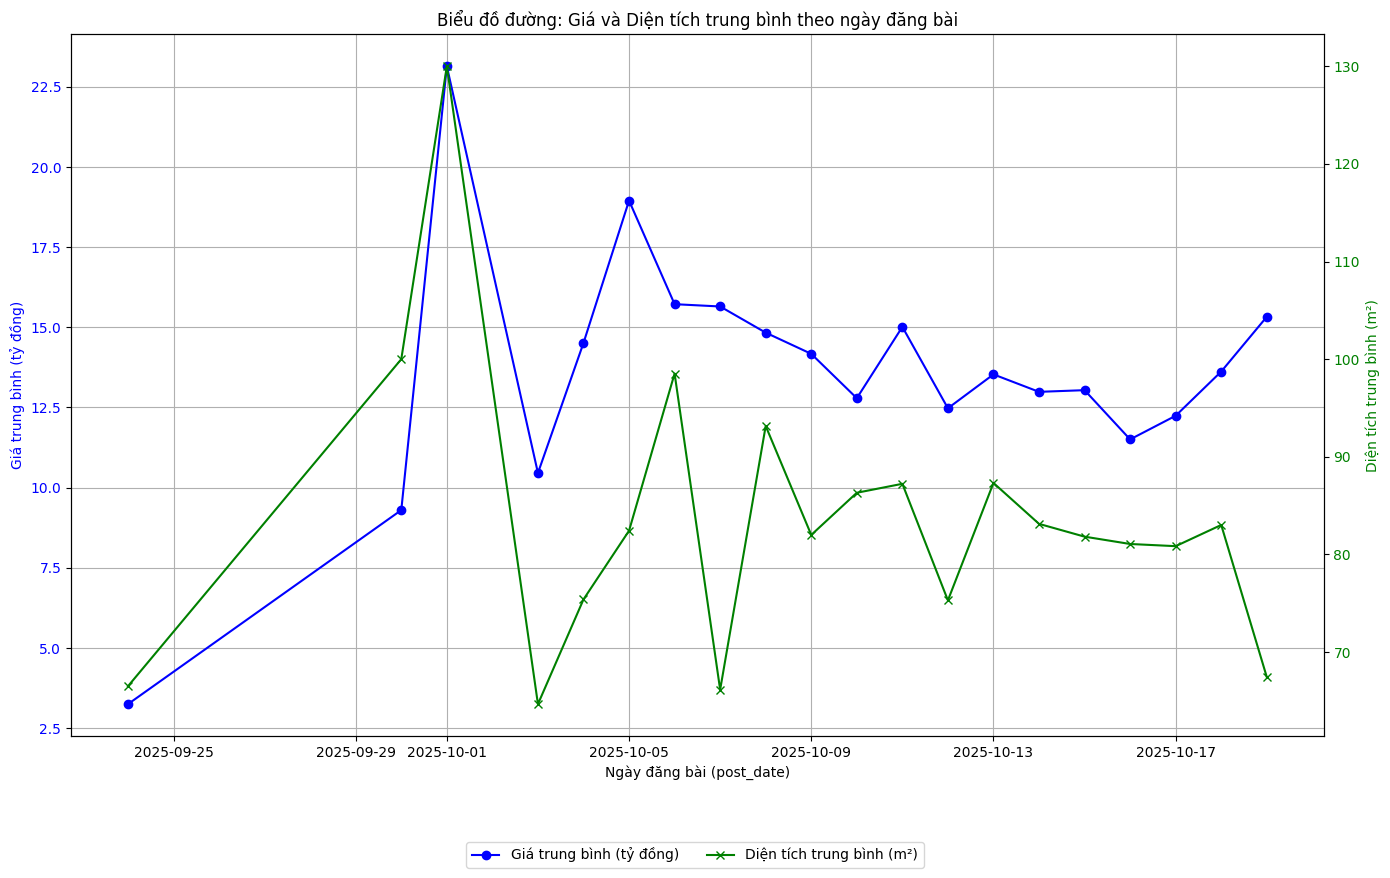

In [16]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('batdongsan_data_no_outliers.csv')

# Thay thế "Missing" trong cột post_date bằng NaN
df['post_date'] = df['post_date'].replace('Missing', pd.NA)

# Lọc bỏ các hàng có post_date là NaN
df = df.dropna(subset=['post_date'])

# Chuyển đổi post_date sang định dạng datetime
df['post_date'] = pd.to_datetime(df['post_date'], format='%d/%m/%Y')

# Sắp xếp DataFrame theo post_date
df = df.sort_values('post_date')

# Nhóm theo post_date và tính giá trị trung bình cho price_ty và area_m2
grouped = df.groupby('post_date')[['price_ty', 'area_m2']].mean().reset_index()

# Vẽ biểu đồ đường với hai trục y
fig, ax1 = plt.subplots(figsize=(14, 8))

# Vẽ đường cho price_ty (trục y bên trái)
ax1.plot(grouped['post_date'], grouped['price_ty'], label='Giá trung bình (tỷ đồng)', marker='o', color='blue')
ax1.set_xlabel('Ngày đăng bài (post_date)')
ax1.set_ylabel('Giá trung bình (tỷ đồng)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Tạo trục y thứ hai cho area_m2
ax2 = ax1.twinx()
ax2.plot(grouped['post_date'], grouped['area_m2'], label='Diện tích trung bình (m²)', marker='x', color='green')
ax2.set_ylabel('Diện tích trung bình (m²)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Tiêu đề và chú thích
plt.title('Biểu đồ đường: Giá và Diện tích trung bình theo ngày đăng bài')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.xticks(rotation=45)
plt.tight_layout()

# Lưu biểu đồ trước khi hiển thị
output_path = os.path.join("img", "line_chart.png")

plt.savefig(output_path, bbox_inches='tight')
print(f"Biểu đồ đã được lưu thành line_chart.png")

# Hiển thị biểu đồ
plt.show()

### Đồ thị điểm rời rạc

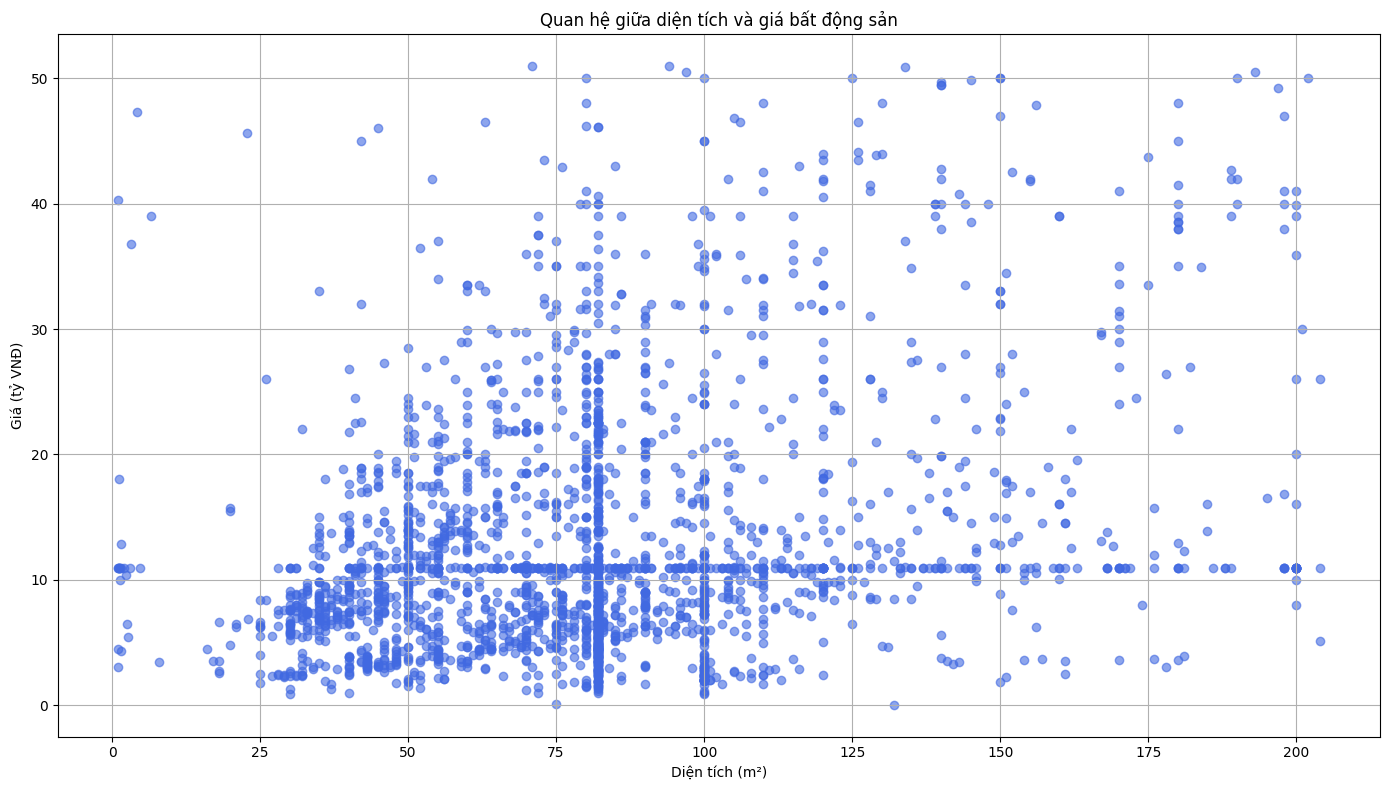

In [17]:

df = pd.read_csv("batdongsan_data_no_outliers.csv")

# Đảm bảo các cột cần thiết tồn tại
cols_needed = ['area_m2', 'price_ty', 'bedrooms_num', 'furniture']
for c in cols_needed:
    if c not in df.columns:
        raise ValueError(f"Thiếu cột {c} trong dữ liệu!")

# ---------------------------
# 2️⃣ Đồ thị điểm rời rạc cơ bản (Scatter Plot)
# ---------------------------
plt.figure(figsize=(14,8))
plt.scatter(df['area_m2'], df['price_ty'], alpha=0.6, color='royalblue')
plt.title("Quan hệ giữa diện tích và giá bất động sản")
plt.xlabel("Diện tích (m²)")
plt.ylabel("Giá (tỷ VNĐ)")
plt.grid(True)
plt.tight_layout()
output_path = os.path.join("img", "scatter_area_price.png")
plt.savefig(output_path, dpi=300)
plt.show()



### Đồ thị điểm rời rạc với biểu đồ phân tán dạng bubble chart

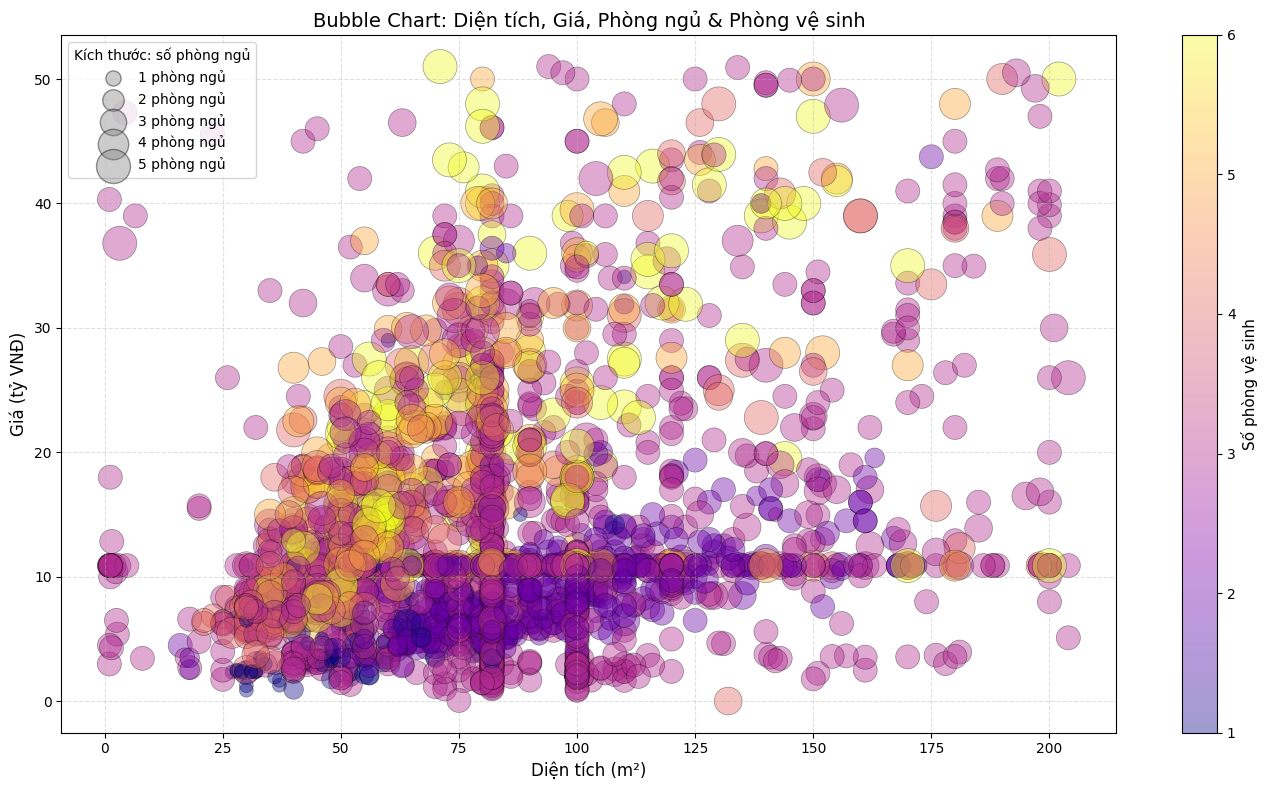

In [18]:
# Loại bỏ Missing và dữ liệu không hợp lệ
df = df.dropna(subset=['area_m2', 'price_ty', 'bedrooms_num', 'toilets_num'])

# Giới hạn kích thước để bong bóng không quá to
df['bedrooms_num'] = df['bedrooms_num'].clip(1, 6)
df['toilets_num'] = df['toilets_num'].clip(1, 6)


plt.figure(figsize=(14, 8))

bubble = plt.scatter(
    df['area_m2'], 
    df['price_ty'], 
    s=df['bedrooms_num'] * 100,     # Kích thước bong bóng ~ số phòng ngủ
    c=df['toilets_num'],            # Màu sắc ~ số phòng vệ sinh
    cmap='plasma',                  # Bảng màu rực, dễ phân biệt
    alpha=0.4,                      # Độ trong suốt
    edgecolor='k',                  # Viền đen giúp rõ ràng
    linewidth=0.5
)

# ----------------------------
# Trang trí biểu đồ
# ----------------------------
plt.title("Bubble Chart: Diện tích, Giá, Phòng ngủ & Phòng vệ sinh", fontsize=14)
plt.xlabel("Diện tích (m²)", fontsize=12)
plt.ylabel("Giá (tỷ VNĐ)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# Thanh màu (colorbar)
cbar = plt.colorbar(bubble)
cbar.set_label("Số phòng vệ sinh", fontsize=11)

# Chú thích kích thước (phòng ngủ)
for i, size in enumerate([1,2,3,4,5]):
    plt.scatter([], [], s=size*120, c='gray', alpha=0.4, edgecolor='k', label=f'{size} phòng ngủ')

plt.legend(
    title='Kích thước: số phòng ngủ',
    loc='upper left',
    bbox_to_anchor=(0, 1.0)
)

# Lưu & hiển thị
plt.tight_layout()

output_path = os.path.join("img", "libubble_chart_4d_analysisne_chart.png")

plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()


### Histogram và mật độ

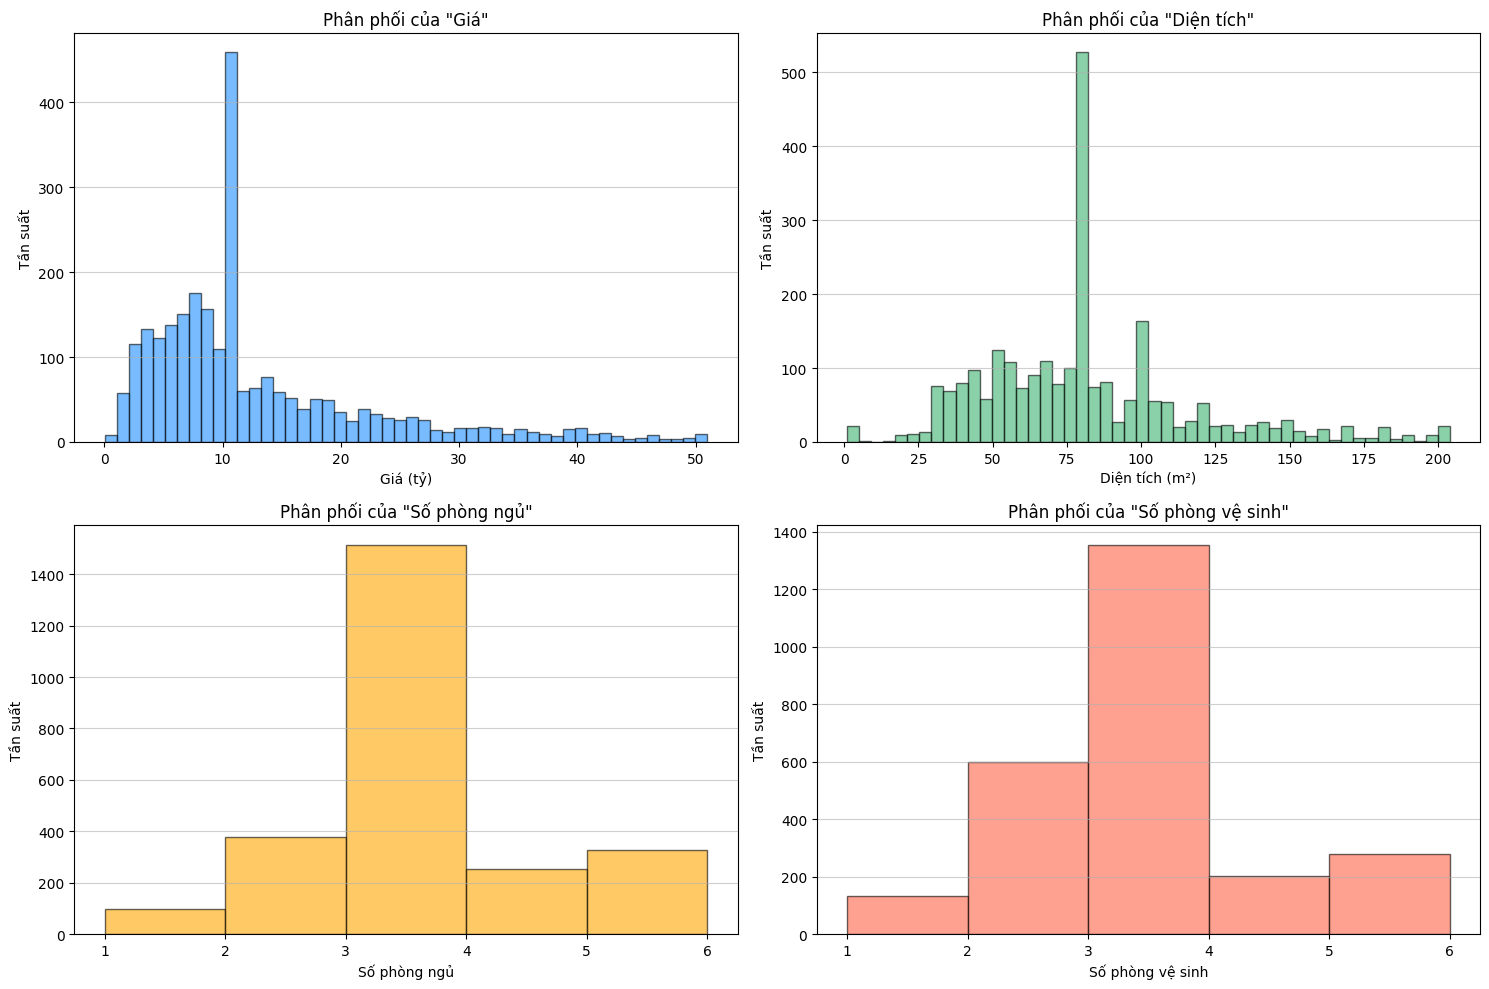

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Xác định min–max cho từng cột
price_min, price_max = df['price_ty'].min(), df['price_ty'].max()
area_min, area_max = df['area_m2'].min(), df['area_m2'].max()
bed_min, bed_max = df['bedrooms_num'].min(), df['bedrooms_num'].max()
toilet_min, toilet_max = df['toilets_num'].min(), df['toilets_num'].max()

# Tạo figure 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# --- Biểu đồ 1: Giá nhà ---
axes[0, 0].hist(df['price_ty'].dropna(),
                bins=np.arange(price_min, price_max + 1, (price_max - price_min)/50),
                color='dodgerblue', edgecolor='black', alpha=0.6)
axes[0, 0].set_title('Phân phối của "Giá"')
axes[0, 0].set_xlabel('Giá (tỷ)')
axes[0, 0].set_ylabel('Tần suất')
axes[0, 0].grid(axis='y', alpha=0.6)

# --- Biểu đồ 2: Diện tích ---
axes[0, 1].hist(df['area_m2'].dropna(),
                bins=np.arange(area_min, area_max + 1, (area_max - area_min)/50),
                color='mediumseagreen', edgecolor='black', alpha=0.6)
axes[0, 1].set_title('Phân phối của "Diện tích"')
axes[0, 1].set_xlabel('Diện tích (m²)')
axes[0, 1].set_ylabel('Tần suất')
axes[0, 1].grid(axis='y', alpha=0.6)

# --- Biểu đồ 3: Phòng ngủ ---
axes[1, 0].hist(df['bedrooms_num'].dropna(),
                bins=np.arange(bed_min, bed_max + 1, 1),
                color='orange', edgecolor='black', alpha=0.6)
axes[1, 0].set_title('Phân phối của "Số phòng ngủ"')
axes[1, 0].set_xlabel('Số phòng ngủ')
axes[1, 0].set_ylabel('Tần suất')
axes[1, 0].grid(axis='y', alpha=0.6)

# --- Biểu đồ 4: Phòng vệ sinh ---
axes[1, 1].hist(df['toilets_num'].dropna(),
                bins=np.arange(toilet_min, toilet_max + 1, 1),
                color='tomato', edgecolor='black', alpha=0.6)
axes[1, 1].set_title('Phân phối của "Số phòng vệ sinh"')
axes[1, 1].set_xlabel('Số phòng vệ sinh')
axes[1, 1].set_ylabel('Tần suất')
axes[1, 1].grid(axis='y', alpha=0.6)

plt.tight_layout()
output_path = os.path.join("img", "histograms_4_selected_fixed.png")
plt.savefig(output_path)
plt.show()


### Trực quan hoá thanh lỗi

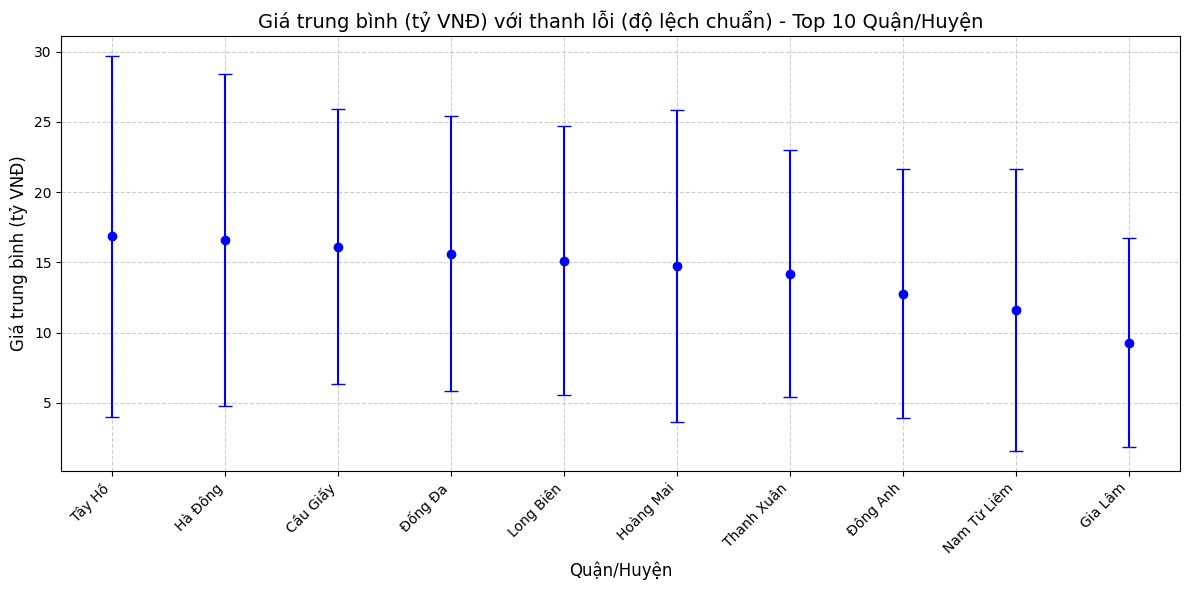

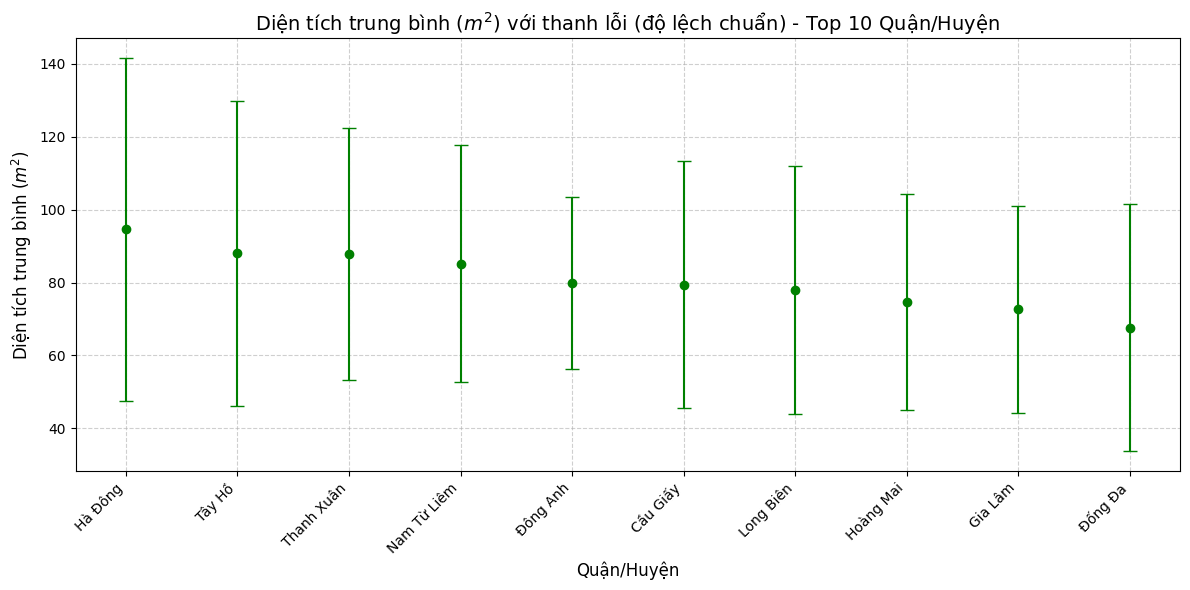

In [20]:
# Loại bỏ giá trị thiếu trong các cột cần dùng
df = df.dropna(subset=["address", "price_ty", "area_m2"])


grouped = (
    df.groupby("district")[["price_ty", "area_m2"]]
    .agg(["mean", "std", "count"])
    .reset_index()
)

grouped.columns = ['_'.join(col).strip('_') if col[1] else col[0] for col in grouped.columns.values]

grouped = grouped.rename(columns={
    'price_ty_mean': 'price_mean',
    'price_ty_std': 'price_std',
    'area_m2_mean': 'area_mean',
    'area_m2_std': 'area_std',
    'price_ty_count': 'count'
})[['district', 'price_mean', 'price_std', 'area_mean', 'area_std', 'count']]


#  top 10 quận có nhiều mẫu nhất
grouped_top = grouped.sort_values("count", ascending=False).head(10)


# Sắp xếp top 10 theo giá trung bình giảm dần để dễ so sánh
grouped_top_price = grouped_top.sort_values("price_mean", ascending=False)

plt.figure(figsize=(12, 6))
plt.errorbar(
    grouped_top_price["district"],
    grouped_top_price["price_mean"],
    yerr=grouped_top_price["price_std"],
    fmt="o",
    capsize=5,
    color="blue",
)
plt.xticks(rotation=45, ha="right")
plt.title("Giá trung bình (tỷ VNĐ) với thanh lỗi (độ lệch chuẩn) - Top 10 Quận/Huyện", fontsize=14)
plt.xlabel("Quận/Huyện", fontsize=12)
plt.ylabel("Giá trung bình (tỷ VNĐ)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
output_path = os.path.join("img", "errorbar_price_by_district_fixed.png")

plt.savefig(output_path, dpi=300, bbox_inches="tight")


# Sắp xếp top 10 theo diện tích trung bình giảm dần để dễ so sánh
grouped_top_area = grouped_top.sort_values("area_mean", ascending=False)

plt.figure(figsize=(12, 6))
plt.errorbar(
    grouped_top_area["district"],
    grouped_top_area["area_mean"],
    yerr=grouped_top_area["area_std"],
    fmt="o",
    capsize=5,
    color="green",
)
plt.xticks(rotation=45, ha="right")
plt.title("Diện tích trung bình ($m^2$) với thanh lỗi (độ lệch chuẩn) - Top 10 Quận/Huyện", fontsize=14)
plt.xlabel("Quận/Huyện", fontsize=12)
plt.ylabel("Diện tích trung bình ($m^2$)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
output_path = os.path.join("img", "errorbar_area_by_district_fixed.png")

plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close() 